## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca
import os

In [2]:
features = []
remote_folder = 'Gel_studies' #Folder in AWS S3 containing files to be analyzed
bucket = 'dtoghani.data'
vids = 10
mws = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Deff2',
          'Mean Mean_Intensity', 'Std Mean_Intensity',
          'X', 'Y', 'Mean X', 'Mean Y', 'Std X', 'Std Y']
calcs = [3]

counter = 0
for calc in calcs:
    for mw in mws:
        for num in range(1, vids+1):
            try:
                filename = 'features_{}_{}mM_XY{}.csv'.format(mw, calc, '%02d' % num)
                # os.remove(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[mw], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                #fstats['Calcium Concentration'] = pd.Series(fstats.shape[0]*[str(calcs)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skip filename: {}'.format(filename))

features_10k_PEG_3mM_XY01.csv
features_10k_PEG_3mM_XY02.csv
features_10k_PEG_3mM_XY03.csv
features_10k_PEG_3mM_XY04.csv
features_10k_PEG_3mM_XY05.csv
features_10k_PEG_3mM_XY06.csv
features_10k_PEG_3mM_XY07.csv
features_10k_PEG_3mM_XY08.csv
features_10k_PEG_3mM_XY09.csv
features_10k_PEG_3mM_XY10.csv
features_5k_PEG_3mM_XY01.csv
features_5k_PEG_3mM_XY02.csv
features_5k_PEG_3mM_XY03.csv
features_5k_PEG_3mM_XY04.csv
features_5k_PEG_3mM_XY05.csv
features_5k_PEG_3mM_XY06.csv
features_5k_PEG_3mM_XY07.csv
features_5k_PEG_3mM_XY08.csv
features_5k_PEG_3mM_XY09.csv
features_5k_PEG_3mM_XY10.csv
features_1k_PEG_3mM_XY01.csv
features_1k_PEG_3mM_XY02.csv
features_1k_PEG_3mM_XY03.csv
features_1k_PEG_3mM_XY04.csv
features_1k_PEG_3mM_XY05.csv
features_1k_PEG_3mM_XY06.csv
features_1k_PEG_3mM_XY07.csv
features_1k_PEG_3mM_XY08.csv
features_1k_PEG_3mM_XY09.csv
features_1k_PEG_3mM_XY10.csv
features_PS_COOH_3mM_XY01.csv
features_PS_COOH_3mM_XY02.csv
features_PS_COOH_3mM_XY03.csv
features_PS_COOH_3mM_XY04.csv


In [ ]:
fstats_new.to_csv('features.csv')

In [3]:
fstats_tot.shape

(1623799, 69)

In [4]:
for mw in mws:
    print(fstats_tot[fstats_tot['Particle Type'] == mw].shape)

(654975, 69)
(437414, 69)
(512800, 69)
(18610, 69)


In [5]:
##fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
#fstats_totMW = fstats_sub[fstats_sub['Particle Type'].isin(['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH'])].reset_index(drop=True)
#nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Calcium Concentration', 'Deff2']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [7]:
ncomp = 16
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.1648307832226626
1 component: 0.27083409513457524
2 component: 0.3683058761084256
3 component: 0.4324473585034973
4 component: 0.48489370632760603
5 component: 0.5324612746561044
6 component: 0.572077868558989
7 component: 0.6097945558621769
8 component: 0.6463045540867481
9 component: 0.6772075718558992
10 component: 0.7043264996456261
11 component: 0.730406686004022
12 component: 0.7533961007868981
13 component: 0.77468824721393
14 component: 0.7923791024478178
15 component: 0.8090705153037598


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

In [8]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [9]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Mean straightness,Mean SN_Ratio,asymmetry3,Std asymmetry1,Mean frames,Mean frames,Mean_Intensity,trappedness,frames,Std asymmetry3,Std SN_Ratio,Deff1,Std kurtosis,Std MSD_ratio,kurtosis,kurtosis
1,Mean efficiency,Mean boundedness,elongation,Std asymmetry2,Mean kurtosis,Quality,Mean Quality,boundedness,straightness,Std asymmetry2,Std MSD_ratio,kurtosis,Mean kurtosis,Std SN_Ratio,Std Deff2,Std Deff2
2,Mean asymmetry3,Mean trappedness,asymmetry2,Mean asymmetry1,Std frames,frames,Quality,frames,D_fit,Std alpha,Mean MSD_ratio,D_fit,Std MSD_ratio,Mean MSD_ratio,Mean Deff2,D_fit
3,Mean alpha,Mean Quality,AR,Mean asymmetry2,Mean asymmetry2,trappedness,Std Quality,MSD_ratio,alpha,Mean alpha,Mean kurtosis,Std SN_Ratio,Std SN_Ratio,Std alpha,SN_Ratio,Mean Deff2
4,Mean Deff1,Std fractal_dim,asymmetry1,Std elongation,Mean straightness,boundedness,Mean AR,alpha,trappedness,Std asymmetry1,SN_Ratio,straightness,Mean MSD_ratio,Mean alpha,Std kurtosis,MSD_ratio


In [10]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Mean alpha', 'Std alpha',
       'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio',
       'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2'],
      dtype='object')

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [11]:
import numpy as np
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='10k_PEG'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='1k_PEG'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_COOH'].values[:, -ncomp:], axis=0)

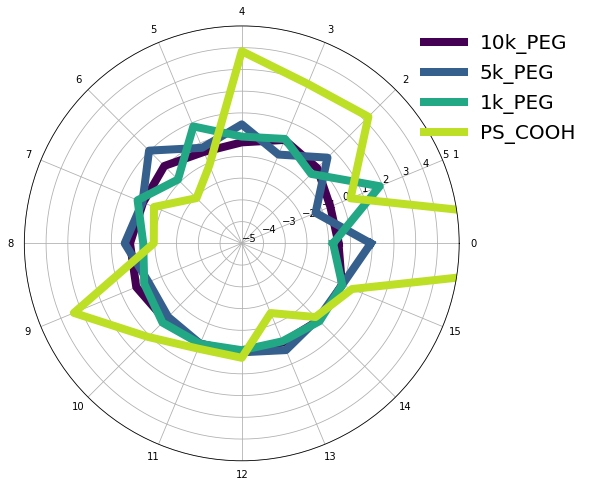

In [12]:
labels = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-5, 5, 11))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
pcadataset.prcomps

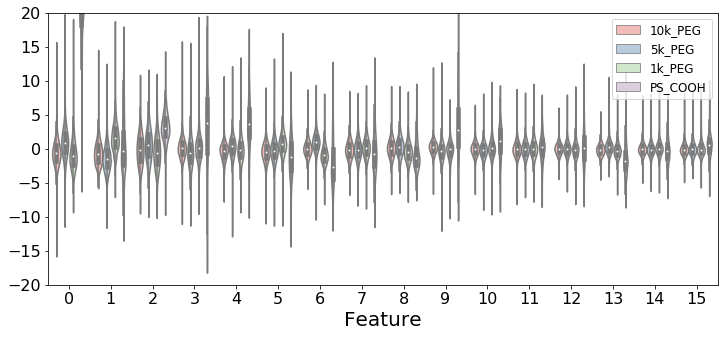

In [20]:
feats = pca.feature_violin(pcadataset.final, label='Particle Type', lvals=labels, fsubset=ncomp, yrange=[-20, 20])

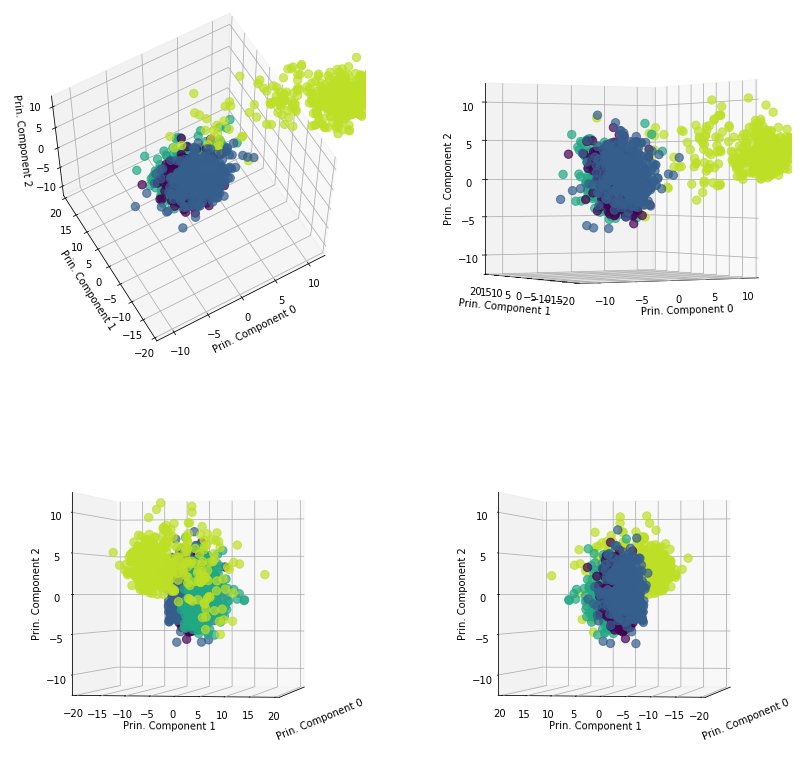

In [21]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Particle Type', lvals=labels, randcount=400, ylim=[-20, 20],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 1, 2])

## Neural Network

In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [17]:
featofvar = 'Particle Type'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.22229774
Validation score: 0.925771
Iteration 2, loss = 0.16629538
Validation score: 0.945129
Iteration 3, loss = 0.12984347
Validation score: 0.958503
Iteration 4, loss = 0.10267694
Validation score: 0.970789
Iteration 5, loss = 0.08427323
Validation score: 0.964795
Iteration 6, loss = 0.07160631
Validation score: 0.982182
Iteration 7, loss = 0.06348908
Validation score: 0.986934
Iteration 8, loss = 0.05743481
Validation score: 0.983680
Iteration 9, loss = 0.05343006
Validation score: 0.990331
Iteration 10, loss = 0.04949065
Validation score: 0.990711
Iteration 11, loss = 0.04749149
Validation score: 0.991922
Iteration 12, loss = 0.04626886
Validation score: 0.987724
Iteration 13, loss = 0.04470843
Validation score: 0.991471
Iteration 14, loss = 0.04245655
Validation score: 0.993647
Iteration 15, loss = 0.04218887
Validation score: 0.991173
Iteration 16, loss = 0.04137313
Validation score: 0.986821
Iteration 17, loss = 0.04035775
Validation score: 0.990444
Valida

Text(0,0.5,'Validation Scores')

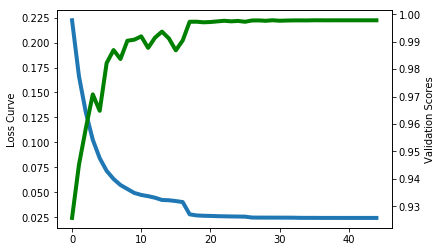

In [19]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.94, 0.99])
ax2.set_ylabel('Validation Scores')